In [12]:
import psycopg2,datetime,heapq
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
conn = psycopg2.connect(database="trademark1", user="tm_root", password="roottm_9823a", host="trueint.lu.im.ntu.edu.tw", port="5433")
#print("Opened database successfully")
cur = conn.cursor()
#conn.close()

In [33]:
conn.close()

In [2]:
# date
cur.execute("SELECT AVG(sdate - filing_date),MAX(sdate - filing_date),MIN(sdate - filing_date) FROM trademark")
r = cur.fetchall()
print("From filing to start")
print("AVG: " , float(r[0][0]))
print("MAX: " , r[0][1])
print("MIN: " , r[0][2])

From filing to start
AVG:  262.30004615672874
MAX:  5628
MIN:  44


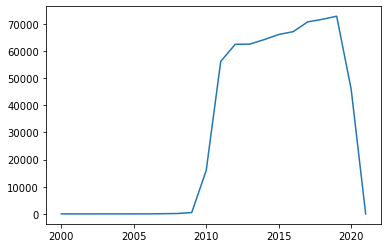

[6, 0, 1, 13, 11, 18, 23, 77, 153, 505, 16035, 56164, 62463, 62521, 64194, 66067, 67120, 70718, 71656, 72796, 45918, 0]


In [112]:
# 申請
cur.execute("SELECT filing_date FROM trademark")
r = cur.fetchall()
r = [i[0].year for i in r]
yearcnt = []
for i in range(22):
    yearcnt.append(0)
for i in r:
    yearcnt[i-2000] += 1

plt.plot(list(range(2000,2022)),yearcnt)
plt.xticks(range(2000,2022,5))
plt.show()
print(yearcnt)

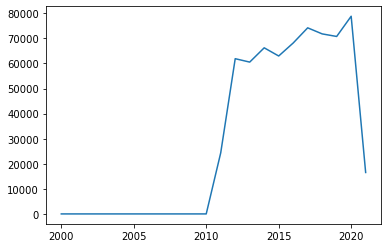

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24360, 61918, 60557, 66257, 62993, 68177, 74226, 71809, 70785, 78849, 16528]


In [109]:
# 公告註冊
cur.execute("SELECT sdate FROM trademark")
r = cur.fetchall()
r = [i[0].year for i in r]
yearcnt = []
for i in range(22):
    yearcnt.append(0)
for i in r:
    yearcnt[i-2000] += 1

plt.plot(list(range(2000,2022)),yearcnt)
plt.xticks(range(2000,2022,5))
plt.show()
print(yearcnt)

In [143]:
# class
cur.execute("SELECT class FROM rcc")
r = cur.fetchall()
print("Total: ",len(r))

Total:  847367


[0, 11477, 3023, 50943, 4151, 50996, 8313, 17831, 6051, 66209, 14490, 17305, 14377, 494, 12258, 1372, 23766, 5405, 20297, 4109, 12948, 17618, 1874, 888, 8920, 39996, 3333, 2106, 17276, 30490, 55503, 11312, 15029, 8101, 2972, 99433, 12844, 11998, 10118, 8416, 5454, 38700, 27022, 49174, 14605, 7615]


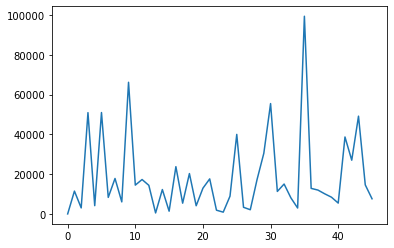

No class: 755


In [151]:
cnt = []
for i in range(46):
    cnt.append(0)
    
for i in r:
    if i[0] != None:
        c = i[0]
        cnt[c] += 1
print(cnt)
plt.plot(cnt)
plt.show()
print("No class:" , len(r) - sum(cnt))

In [2]:
# 產業名稱處理
from io import StringIO
from io import open
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage

def process_pdf(rsrcmgr, device, fp, pagenos=None, maxpages=0, password='', caching=True, check_extractable=True):
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=check_extractable):
        interpreter.process_page(page)
    return

def Get_pdf_content():
    pdf = open("C:\\Users\\User\\OneDrive - g.ntu.edu.tw\\Desktop\\Jack\\1_Course\\109-2\\IM Project\\文件\\產業目錄.pdf", "rb")
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    process_pdf(rsrcmgr, device, pdf)
    device.close()
    content = retstr.getvalue()
    retstr.close()
    lines = str(content).split("\n")
    return lines

In [3]:
l = Get_pdf_content()
classcontent = [""]
for j in range(1,46):
        for i in l:
            if "第  " + str(j) + "  類：" in i or "第  " + str(j) + " 類：" in i:
                classcontent.append(i)
                break

In [4]:
print(classcontent)

['', '第  1  類：工業、科學、照相用，以及農業、園藝、林業用之化學品；未加工人造樹脂、未加工塑膠；', '第  2  類：漆、清漆、亮光漆；防銹劑及木材防腐劑；著色劑、染料；印刷、打印及雕版用油墨；未', '第  3  類：不含藥化粧品及盥洗用製劑；不含藥牙膏、牙粉；香料、香精油；洗衣用漂白劑及其他洗', '第  4  類：工業用油及油脂、蠟；潤滑劑；灰塵吸收劑、灰塵濕潤劑及灰塵黏著劑；燃料及照明用燃', '第  5  類：藥品、醫療用及獸醫用製劑；醫療用衛生製劑；醫療用或獸醫用食療食品、嬰兒食品；人', '第  6  類：普通金屬及其合金、礦砂；建築及結構工程用金屬材料；可移動金屬建築物；普通金屬製', '第  7  類：機器、工具機、電動工具；非陸上交通工具用馬達及引擎；非陸上交通工具用機器聯結器', '第  8  類：手動式手工用具及器具；刀叉匙餐具；非槍砲之隨身武器；剃刀。 ', '第  9  類：科學、研究、導航、測量、攝影、電影、視聽、光學、計重、計量、信號、檢測、測試、', '第  10  類：外科、內科、牙科與獸醫用之器具及儀器；義肢、義眼、假牙；矯形用品；傷口縫合材料；', '第  11  類：照明、加熱、冷卻、產生蒸氣、烹飪、乾燥、通風、給水及衛浴設備和裝置。 ', '第  12  類：交通工具；陸運、空運或水運用器械。 ', '第  13  類：火器；火藥及發射體；爆炸物；煙火。 ', '第  14  類：貴重金屬及其合金；首飾，寶石及半寶石；鐘錶和計時儀器。 ', '第  15  類：樂器；樂譜架及樂器支架；指揮棒。 ', '第  16  類：紙及紙板；印刷品；裝訂材料；照片；家具除外之文具及辦公用品；文具用或家庭用黏著', '第  17  類：未加工及半加工之橡膠、馬來樹膠、樹膠、石棉、雲母及該等材料之替代品；生產時使用', '第  18  類：皮革及人造皮革；動物皮及獸皮；行李袋及手提袋；傘及遮陽傘；手杖；鞭子、馬具；動', '第  19  類：非金屬製建築材料；建築用非金屬製硬管；柏油、瀝青；非金屬製可移動之建築物；非金', '第  20  類：家具、鏡子、畫框；貯藏或運輸用非金屬製容器；未加工或半加工之骨、角、鯨骨或珍珠', '第  21  類：家庭或廚房用具及容器；餐叉、餐刀及餐匙以外之烹飪用具及餐具；梳子及海綿；畫筆除'

In [152]:
# Top 10 classes
index = list(map(cnt.index, heapq.nlargest(10, cnt)))
print(index)
for x in [classcontent[i] for i in index]:
    print(x)

[35, 9, 30, 5, 3, 43, 25, 41, 29, 42]
第  35  類：廣告；企業管理，組織及經營；辦公事務。 
第  9  類：科學、研究、導航、測量、攝影、電影、視聽、光學、計重、計量、信號、檢測、測試、
第  30  類：咖啡、茶、可可及代用咖啡；米、義大利麵條及麵條；樹薯粉及西谷米；麵粉及穀
第  5  類：藥品、醫療用及獸醫用製劑；醫療用衛生製劑；醫療用或獸醫用食療食品、嬰兒食品；人
第  3  類：不含藥化粧品及盥洗用製劑；不含藥牙膏、牙粉；香料、香精油；洗衣用漂白劑及其他洗
第  43  類：提供食物及飲料之服務；臨時住宿。 
第  25  類：衣著、靴鞋、頭部穿戴物。 
第  41  類：教育；提供訓練；娛樂；運動及文化活動。 
第  29  類：肉、魚肉、家禽肉及野味；濃縮肉汁；經保存處理、冷凍、乾製及烹調之水果及蔬菜；果
第  42  類：科學及技術性服務與研究及其相關之設計；工業分析，工業研究及工業設計服務；品質管


In [128]:
# 地址(前20)
add = {}
cur.execute("SELECT address FROM rco")
r = cur.fetchall()
for x in r:
    try:
        add[x[0]] = add[x[0]] + 1
    except:
        add[x[0]] = 1
print(sorted(add.items(), key=lambda add: add[1],reverse=True)[:20])

[('臺北市', 135490), ('臺中市', 79161), ('新北市', 77167), ('高雄市', 45419), ('臺南市', 40017), ('中國大陸', 34740), ('日本', 34317), ('美國', 32524), ('桃園市', 19255), ('彰化縣', 19237), ('香港', 11187), ('南韓', 9904), ('桃園縣', 8767), ('南投縣', 7653), ('德國', 7537), ('雲林縣', 7313), ('屏東縣', 6750), ('新竹縣', 6397), ('法國', 6220), ('新竹市', 6185)]


In [129]:
# 類別
design = {}
cur.execute("SELECT Trademark_Design FROM trademark")
r = cur.fetchall()
for x in r:
    try:
        design[x[0]] = design[x[0]] + 1
    except:
        design[x[0]] = 1
print(sorted(design.items(), key=lambda design: design[1],reverse=True))

[('(墨色)(平面)', 532690), ('(彩色)(平面)', 123177), ('(彩色)(立體)', 351), ('(墨色)(立體)', 165), ('(墨色)(聲音)', 24), ('(墨色)(其他)', 17), ('(彩色)(顏色)', 15), ('(彩色)(其他)', 10), ('(彩色)(動態)', 8), ('(彩色)(全像圖)', 2)]


In [131]:
# Mark type
typ = [0,0,0,0]
cur.execute("SELECT Mark_type FROM trademark")
r = cur.fetchall()
for x in r:
    typ[x[0]] += 1
print(typ)

[655589, 116, 319, 435]


In [133]:
# Wav
cur.execute("SELECT caseno,Wavpath FROM trademark WHERE Wavpath is not null")
r = cur.fetchall()
print(r)

[(100037345, 'sounds/wav_100037345_20130830.wav'), (102051719, 'Sounds/102051719.wav'), (101041745, 'sounds/video_101041745_20120803.avi'), (102022784, 'sounds/video_102022784_20130507.avi'), (102032472, 'sounds/video_102032472_20140422.mpg'), (102032474, 'sounds/video_102032474_20140422.mpg'), (103055523, 'sounds/wav_103055523_20140925.wav'), (102061979, 'sounds/wav_102061979_20140801.wav'), (102022780, 'sounds/wav_102022780_20130506.wav'), (103003135, 'sounds/wav_103003135_20140918.wav'), (103028309, 'sounds/video_103028309_20140526.avi'), (101032488, 'sounds/wav_101032488_20150702.wav'), (100047374, 'sounds/wav_100047374_20140609.wav'), (104034398, 'sounds/wav_104034398_20150616.wav'), (104034397, 'sounds/wav_104034397_20150616.wav'), (103057800, 'sounds/wav_103057800_20160816.wav'), (103053150, 'sounds/wav_103053150_20140915.wav'), (104023315, 'sounds/video_104023315_20150507.mpg'), (103073670, 'sounds/wav_103073670_20161124.wav'), (103073675, 'sounds/wav_103073675_20161124.wav'), 

In [138]:
# 商標擁有權人(前20)(Agency)
add = {}
cur.execute("SELECT BChinese FROM rca")
r = cur.fetchall()
for x in r:
    try:
        add[x[0]] = add[x[0]] + 1
    except:
        add[x[0]] = 1
print(sorted(add.items(), key=lambda add: add[1],reverse=True)[:20])

[('林景郁', 44739), ('閻啓泰', 38983), ('高玉駿', 36146), ('楊祺雄', 36063), ('陳長文', 26927), ('林志剛', 15225), ('丁靜玟', 8495), ('李世章', 8162), ('惲軼群', 7645), ('謝君玄', 7597), ('沈慶慧', 7052), ('林雪美', 7052), ('林志雄', 6922), ('陳順法', 6801), ('王鈞平', 6026), ('蔡坤財', 5945), ('李文傑', 5870), ('李博涵', 5845), ('閻啟泰', 5826), ('謝福順', 5608)]


In [136]:
# 商標擁有權公司(前20)
add = {}
cur.execute("SELECT AChinese FROM rco")
r = cur.fetchall()
for x in r:
    try:
        add[x[0]] = add[x[0]] + 1
    except:
        add[x[0]] = 1
print(sorted(add.items(), key=lambda add: add[1],reverse=True)[:20])

[('統一企業股份有限公司', 3570), ('統一超商股份有限公司', 782), ('王品餐飲股份有限公司', 772), ('統正開發股份有限公司', 598), ('日商資生堂股份有限公司', 596), ('中華電信股份有限公司', 518), ('開曼群島商騰訊控股有限公司', 495), ('棨泰健康科技股份有限公司', 494), ('法商拉奧里露公司', 485), ('特力股份有限公司', 477), ('美商蘋果公司', 476), ('東方美企業股份有限公司', 466), ('金車股份有限公司', 462), ('瓦城泰統股份有限公司', 426), ('佳格食品股份有限公司', 423), ('瑞士商．諾華公司', 408), ('臺中市政府', 403), ('美商壯生和壯生股份有限公司', 395), ('臺灣菸酒股份有限公司', 368), ('日商日產自動車股份有限公司', 364)]


In [137]:
# censor(前20)
add = {}
cur.execute("SELECT censor FROM trademark")
r = cur.fetchall()
for x in r:
    try:
        add[x[0]] = add[x[0]] + 1
    except:
        add[x[0]] = 1
print(sorted(add.items(), key=lambda add: add[1],reverse=True)[:20])

[('鄭淑芬', 21681), ('郭珮萱', 17760), ('黃妙娟', 16316), ('趙立珍', 15696), ('江小燕', 14629), ('胡錦蓉', 14419), ('王秋梅', 14394), ('倪麗萍', 14130), ('朱彩雲', 14099), ('方長玲', 14014), ('陳嬿棻', 13985), ('吳健政', 13903), ('袁月美', 13826), ('陳愛玉', 13658), ('鄭春萍', 13447), ('王彩鳳', 12399), ('鍾桂華', 12368), ('洪文彬', 12001), ('洪梅玲', 11982), ('吳秋敏', 11791)]


In [140]:
# ServiceMark
typ = [0,0]
cur.execute("SELECT ServiceMark FROM trademark")
r = cur.fetchall()
for x in r:
    typ[x[0]] += 1
print(typ)

[656459, 0]


In [155]:
#RCP 不同 ==
cur.execute("SELECT caseno FROM rcp WHERE filename != displayname OR filename != path or path != displayname")
r = cur.fetchall()
print(r)

[97043135, 97043139, 99042770, 99055247, 99058815, 99045264, 99060282, 99058665, 99040791, 99047608, 100005289, 99050345, 97047053, 99048832, 99052259, 99005420, 99044955, 99007251, 99064155, 99064063, 99045453, 100006982, 99053935, 99047005, 100015868, 99051513, 99052138, 100025214, 99064535, 100032363, 100032365, 97050151, 100027557, 99063183, 100055789, 100038661, 100007134, 99059960, 100042259, 100031969, 95051529, 101008915, 101013901, 101007222, 101007220, 101017917, 101045892, 100052805, 101037684, 101039697, 101021555, 101034939, 101034940, 101026955, 101053319, 101054443, 101039227, 101039228, 102066557, 102051719, 105021486, 105021880, 105046217, 105059337, 105057419, 107019138, 107022567, 107072916, 107076469, 107077308, 108029453, 108029613, 109011166, 109005047, 109001800, 109006095, 109030366, 109023472, 109030474, 109029536]


In [164]:
"""
= CaseNo =
= RegisterNo =
= Trademark_Name =
= Trademark_Design =
= Filing_Date =
= Censor =
= Priority_Date =
= SDate =
= EDate =
= Word_Description =
= Mark_Type =
= Memo =
= Wavpath =
= ServiceMark =
= RegContentAgent =
	== BChinese ==
= RegContentClassification =
	== Enforcement_Rules ==
	== Class ==
	== Goods_Denomination ==
= RegContentOwner =
	== AChinese ==
	== AEnglish ==
	== Address ==
= RegContentPicture =
	== FileName ==
	== DisplayName ==
	== Path ==
"""

'\n= CaseNo =\n= RegisterNo =\n= Trademark_Name =\n= Trademark_Design =\n= Filing_Date =\n= Censor =\n= Priority_Date =\n= SDate =\n= EDate =\n= Word_Description =\n= Mark_Type =\n= Memo =\n= Wavpath =\n= ServiceMark =\n= RegContentAgent =\n\t== BChinese ==\n= RegContentClassification =\n\t== Enforcement_Rules ==\n\t== Class ==\n\t== Goods_Denomination ==\n= RegContentOwner =\n\t== AChinese ==\n\t== AEnglish ==\n\t== Address ==\n= RegContentPicture =\n\t== FileName ==\n\t== DisplayName ==\n\t== Path ==\n'

In [6]:
def getall(ID):
    cur.execute("SELECT * FROM rca WHERE caseno = %s"%ID)
    r = cur.fetchall()
    print("From rca:")
    print(r)
    print("==========")

    cur.execute("SELECT * FROM rcc WHERE caseno = %s"%ID)
    r = cur.fetchall()
    print("From rcc:")
    print(r)
    print("==========")


    cur.execute("SELECT * FROM rco WHERE caseno = %s"%ID)
    r = cur.fetchall()
    print("From rco:")
    print(r)
    print("==========")


    cur.execute("SELECT * FROM rcp WHERE caseno = %s"%ID)
    r = cur.fetchall()
    print("From rcp:")
    print(r)
    print("==========")


    cur.execute("SELECT * FROM trademark WHERE caseno = %s"%ID)
    r = cur.fetchall()
    print("From trademark:")
    print(r)
    print("==========")


In [7]:
def showimage(ID):
    conn = psycopg2.connect(database="trademark1", user="tm_root", password="roottm_9823a", host="trueint.lu.im.ntu.edu.tw", port="5433")
    cur = conn.cursor()
    
    Path = ""
    cur.execute("SELECT doc FROM trademark WHERE caseno = %s"%ID)
    doc = cur.fetchall()
    Path += doc[0][0] + "/"
    
    cur.execute("SELECT Filename FROM rcp WHERE caseno = %s"%ID)
    name = cur.fetchall()
    Path += name[0][0]
    
    conn.close()
    
    os.chdir('/service/trademark/raw_data/XMLB/')
    img = mpimg.imread(Path)
    imgplot = plt.imshow(img)
    plt.show()
    

In [8]:
def printclassimg(i,num):
    print(classcontent[i])
    cur.execute("SELECT caseno FROM rcc WHERE class = %d"%i)
    l = cur.fetchall()
    for x in range(num):
        rad = random.randint(0,len(l)-1)
        caseno = l[rad][0]
        print("Caseno: ",caseno)
        showimage(str(caseno))

In [9]:
def printcompanyimg(com,num):
    cur.execute("SELECT caseno FROM rco WHERE AChinese = '%s'"%com)
    l = cur.fetchall()
    for x in range(num):
        rad = random.randint(0,len(l)-1)
        caseno = l[rad][0]
        print("Caseno: ",caseno)
        showimage(str(caseno))

In [10]:
def printdesignimg(des,num):
    cur.execute("SELECT caseno FROM trademark WHERE Trademark_Design = '%s'"%des)
    l = cur.fetchall()
    for x in range(num):
        rad = random.randint(0,len(l)-1)
        caseno = l[rad][0]
        print("Caseno: ",caseno)
        showimage(str(caseno))

In [13]:
#printclassimg(30,5)
printcompanyimg("中華電信股份有限公司",5)
#printdesignimg("(墨色)(聲音)",5)

Caseno:  101065118


FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: '/service/trademark/raw_data/XMLB/'